<a href="https://colab.research.google.com/github/isidoreduc/DL-with-pythorch/blob/main/ch2_alexnet_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

intro


In [38]:
from torchvision import models
# take a look at models available
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

The capitalized names refer to Python classes that implement a number of popular
models. They differ in their architecture—that is, in the arrangement of the operations
occurring between the input and the output. The lowercase names are convenience
functions that return models instantiated from those classes, sometimes with different
parameter sets. For instance, resnet101 returns an instance of ResNet with 101 layers,
resnet18 has 18 layers, and so on. We’ll now turn our attention to AlexNet.


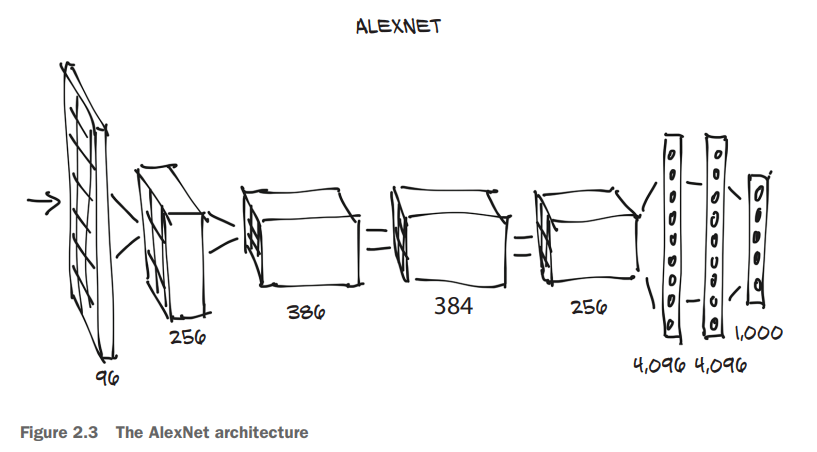

First, each block consists
of a bunch of multiplications and additions, plus a sprinkle of other functions in the
output. We can think of it as a filter—a function that
takes one or more images as input and produces other images as output. The way it
does so is determined during training, based on the examples it has seen and on the
desired outputs for those.

In figure 2.3, input images come in from the left and go through five stacks of filters,
each producing a number of output images. After each filter, the images are reduced
in size, as annotated. The images produced by the last stack of filters are laid out as a
4,096-element 1D vector and classified to produce 1,000 output probabilities, one for
each output class.

In [39]:
# to use AlexNet model to predict an image we input, we have to create an instance
alexnet = models.AlexNet()

# either use the data it's been trained originally or input new data set
# instantiating resnet101 - a 101-layer convolutional neural network with pretrained weights
resnet = models.resnet101(pretrained = True)
# to see the 101 layers:
# resnet



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


That’s the anatomy of a typical deep neural network for computer vision: a more or less sequential
cascade of filters and nonlinear functions, ending with a layer (fc) producing scores
for each of the 1,000 output classes (out_features).

 The resnet variable can be called like a function, taking as input one or more
images and producing an equal number of scores for each of the 1,000 ImageNet
classes. Before we can do that, however, we have to preprocess the input images so
they are the right size and so that their values (colors) sit roughly in the same numerical range.

In [40]:
from torchvision import transforms
preprocess = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
  mean=[0.485, 0.456, 0.406],
  std=[0.229, 0.224, 0.225]
)]
)

# now we can feed the model an image we upload on Google Colab using from Pillow library (https://pillow.readthedocs.io/en/stable)
from PIL import Image
# img = Image.open("/content/cute-cat-videos-lede.jpg")
# img = Image.open("/content/dogo.jpg")
img = Image.open("/content/bobby.jpg")
# img = Image.open("/content/refrigerator.jpg")

# see image
img.show()

# preprocess image
proc_img = preprocess(img)

In [41]:
#  unsqueeze tensor
import torch
batch_t = torch.unsqueeze(proc_img, 0)

The process of running a trained model on new data is called inference in deep learning circles. In order to do inference, we need to put the network in eval mode:

In [42]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

If we forget to do that, some pretrained models, like batch normalization and dropout,
will not produce meaningful answers, just because of the way they work internally.
Now that eval has been set, we’re ready for inference:

In [43]:
out = resnet(batch_t)
out

tensor([[-3.4997e+00, -1.6490e+00, -2.4391e+00, -3.2243e+00, -3.2465e+00,
         -1.3218e+00, -2.0395e+00, -2.5405e+00, -1.3043e+00, -2.8827e+00,
         -1.6696e+00, -1.2838e+00, -2.6184e+00, -2.9750e+00, -2.4380e+00,
         -2.8256e+00, -3.3083e+00, -7.9667e-01, -6.7075e-01, -1.2162e+00,
         -3.0311e+00, -3.9593e+00, -2.2631e+00, -1.0843e+00, -9.7915e-01,
         -1.0742e+00, -3.0908e+00, -2.4751e+00, -2.2153e+00, -3.1932e+00,
         -3.2964e+00, -1.8507e+00, -2.0642e+00, -2.1202e+00, -1.8665e+00,
         -3.2375e+00, -1.1210e+00, -1.1321e+00, -1.1657e+00, -9.0361e-01,
         -4.5209e-01, -1.4986e+00,  1.4366e+00,  1.2994e-01, -1.8379e+00,
         -1.4815e+00,  9.7278e-01, -9.3662e-01, -3.0276e+00, -2.7341e+00,
         -2.5960e+00, -2.0591e+00, -1.8170e+00, -1.9437e+00, -1.7875e+00,
         -1.3029e+00, -4.5200e-01, -2.0560e+00, -3.2882e+00, -4.7583e-01,
         -3.6261e-01, -1.1650e+00, -7.3942e-01, -1.4489e+00, -1.5039e+00,
         -2.1096e+00, -1.7095e+00, -4.

In [44]:
#  max function in
# PyTorch, which outputs the maximum value in a tensor as well as the indices where
# that maximum value occurred
_, index = torch.max(out, 1)

We can now use the index to access the label. Here, index is not a plain Python number, but a one-element, one-dimensional tensor (specifically, tensor([207])), so we
need to get the actual numerical value to use as an index into our labels list using
index[0]. We also use torch.nn.functional.softmax (http://mng.bz/BYnq) to normalize our outputs to the range [0, 1], and divide by the sum. That gives us something
roughly akin to the confidence that the model has in its prediction. In this case, the
model is 96% certain that it knows what it’s looking at is golden retriever :))

In [45]:
# upload text doc with list of 1000 labels
with open('/content/imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.57185363769531)

In [46]:
# golden retriever and other 3 dogos in top 5
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.57185363769531),
 ('Labrador retriever', 2.6082630157470703),
 ('cocker spaniel, English cocker spaniel, cocker', 0.26996269822120667),
 ('redbone', 0.17958903312683105),
 ('tennis ball', 0.10991978645324707)]